# Logistic Regression from Scratch with TensorFlow

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm

## Non-regularized Logistic Regression

### Fetch dataset
#### Read dataset

In [2]:
path = './dataset'
file_name = 'ex2data1.txt'
dataset = pd.read_csv(os.path.join(path, file_name), header=None)
dataset.columns = ['exam1', 'exam2', 'decision']
dataset.head()

,exam1,exam2,decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


#### Split dataset into featureset and target

In [3]:
featureset = dataset.values[:,:2]
target = dataset.values[:,2].reshape(-1,1)

### Visualize Dataset
#### Shape information of data

In [4]:
print("Shape of featureset: ", featureset.shape)
print("Shape of target: ", target.shape)
print("Number of feature: ", featureset.shape[1])
print("Nummber of training examples: ",target.shape[0])

Shape of featureset:  (100, 2)
Shape of target:  (100, 1)
Number of feature:  2
Nummber of training examples:  100


#### Ploting data

Text(0.5, 1.0, 'Data Visulizations')

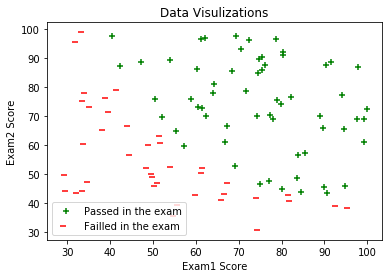

In [5]:
zeros = target==0
ones = target==1

plt.scatter(featureset[ones[:,0], 0], featureset[ones[:, 0], 1], marker='+', color='g')
plt.scatter(featureset[zeros[:,0], 0], featureset[zeros[:, 0], 1], marker=0, color='r')

plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.legend(["Passed in the exam","Failled in the exam"])
plt.title("Data Visulizations")

### Building Logistic Regression
#### Write necessary method

In [6]:
def feature_normalization(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X-mean)/std
    return X_norm, mean, std

In [7]:
def sigmoid(z):
    return 1/(1+tf.exp(-z))

In [8]:
def compute_cost_grad(X, y, theta):
    
    # Number of training example
    m = int(y.shape[0])
    
    # Calculate cost
    z = tf.matmul(X, tf.transpose(theta)) # hypothesis
    hx = sigmoid(z) # apply sigmoid function
    cost = (1/m) * tf.reduce_sum( -y * tf.log(hx) - (1-y) * tf.log(1-hx) ,axis=0) # calculatinf cost
    
    # Calculate grad
    grad = (1/m) * tf.matmul(tf.transpose(hx-y), X)
    
    return cost, grad
    
    

In [9]:
def predictions(X, theta):
    hx = sigmoid(tf.matmul(X, tf.transpose(theta)))
    
    return hx>=0.5

In [10]:
def model(X, y, theta, lr, itr):
    
    # Number of training example
    m = int(y.shape[0])
    costs = []
    
    for i in tqdm(range(itr)):
        cost, grad = compute_cost_grad(X, y, theta)
        theta = theta - lr * grad
        costs.append(cost)
    
    predicted = predictions(X, theta)
    
    parameters = {
        'costs': costs,
        'theta': theta,
        'predicted': predicted
    }
    
    return parameters


#### Setup for model training

In [11]:
learning_rate = 0.0
iterations = 400
m = target.shape[0]
x_norm, mean, std = feature_normalization(featureset)
xtrain = np.hstack((np.ones((m,1)),x_norm))
ytrain = target

X = tf.placeholder(tf.float32, xtrain.shape)
y = tf.placeholder(tf.float32, ytrain.shape)

thetas = tf.Variable(tf.zeros((1,xtrain.shape[1]), tf.float32))

training = model(X, y, theta=thetas, lr=learning_rate, itr=iterations)

100%|██████████| 400/400 [00:09<00:00, 41.02it/s]


### Training model

#### Traing with different learning rate

In [12]:
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0]

results = []

for lr in learning_rates:
    training = model(X, y, theta=thetas, lr=lr, itr=iterations)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        result = sess.run(training, feed_dict={X:xtrain, y:ytrain})
        results.append(result)

100%|██████████| 400/400 [00:08<00:00, 44.50it/s]


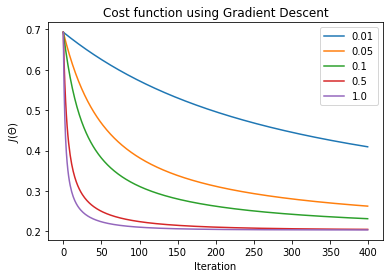

In [13]:
for result in results:
    plt.plot(result["costs"])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.legend(learning_rates)
plt.show()

#### Result withe learning rate 0.1

In [14]:
predicted = results[2]['predicted']
print('Accuracy score: ', np.mean(ytrain==predicted))

Accuracy score:  0.9


#### Ploting decison boundary

In [15]:
x_boundary = np.array([np.max(xtrain[:,1]), np.min(xtrain[:,1])]).reshape(-1,1)
theta = results[2]['theta'].flatten()
y_boundary = -(theta[0] + theta[1]*x_boundary)/theta[2]

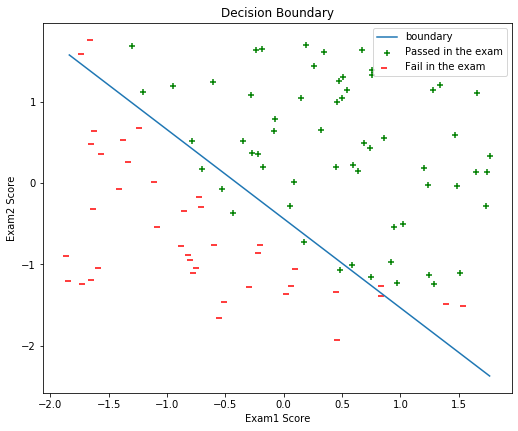

In [16]:
plt.figure(figsize=(8.4, 6.8))
plt.scatter( xtrain[ ones[:,0], 1 ], xtrain[ ones[:,0], 2 ], marker='+', color='g' )
plt.scatter( xtrain[ zeros[:,0], 1 ], xtrain[zeros[:,0],2] , marker=0, color='r')
plt.plot(x_boundary,y_boundary)
plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.legend(["boundary","Passed in the exam","Fail in the exam"])
plt.title("Decision Boundary")
# plt.grid()
plt.show()


## Regularized Logistic Regression

In [17]:
# Load Dataset
path = "./dataset"
dataset = pd.read_csv(os.path.join(path,'ex2data2.txt'),header=None)
dataset.columns = ["test_1","test_2","result"]
dataset.head()

,test_1,test_2,result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [18]:
featureset = dataset.values[:,:2]
target = dataset.values[:,2].reshape(-1,1)

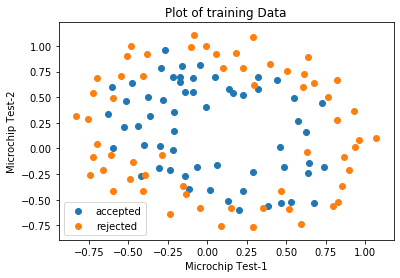

In [19]:
# Visualize the data
ones = target==1
zeros = target==0
plt.scatter(featureset[ones[:,0],0], featureset[ones[:,0],1])
plt.scatter(featureset[zeros[:,0],0], featureset[zeros[:,0],1])
plt.xlabel("Microchip Test-1")
plt.ylabel("Microchip Test-2")
plt.title("Plot of training Data")
plt.legend(["accepted",'rejected'])

#### Necessary method implementations

In [20]:
def feature_mapping(x1, x2):
    degree = 6
    if x1.ndim > 0:
        out = [np.ones(x1.shape[0])]
    else:
        out = [np.ones(1)]
    
    for i in range(degree+1):
        for j in range(i+1):
            out.append( ( x1 **(i-j) ) * (x2**j) )
    
    if x1.ndim>0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)


In [21]:
def compute_reg_cost_grad(m, X, y, theta, _lambda):
    z = tf.matmul( X, tf.transpose(theta) )
#     hx = tf.sigmoid(z)
    hx = sigmoid(z)
    error = -y*tf.log(hx) - (1-y)*tf.log(1-hx)
    cost = (1/m) * tf.reduce_sum(error, axis=0)
    reg_term = (_lambda/(2*m)) * tf.reduce_sum(tf.pow(theta[:, 1:], 2), axis=1)
    reg_cost = cost + reg_term

    grad_0 =  tf.matmul(tf.transpose(hx-y), tf.reshape(X[:,0], (-1,1)))/m
    grad_1 = tf.matmul(tf.transpose(hx-y), X[:,1:] )/m
    reg_term = (_lambda/m) * theta[:, 1:]
#     print(grad_1.shape)
#     print(reg_term.shape)
    grad_1 = grad_1 + reg_term
    reg_grad = tf.concat([grad_0, grad_1], axis=1)

    return reg_cost, reg_grad

In [22]:
def predictions(X, theta):
    pred = tf.sigmoid(tf.matmul(X, tf.transpose(theta)))
    return pred >=0.5

In [23]:
def model(m, X, y, theta, lr, _lambda, itr):
    costs = []
    for i in tqdm(range(itr)):
        cost, grad = compute_reg_cost_grad(m, X, y, theta, _lambda)
        theta = theta - lr * grad
        costs.append(cost)
        
    predicted = predictions(X, theta)
    parameters = {
        'costs': costs,
        'theta': theta,
        'predicted': predicted
    }
    return parameters

#### Setup for training

In [24]:
m = target.shape[0]
_lambda = 1
learning_rate = 0.2
iterations = 500

xtrain = feature_mapping(featureset[:, 0], featureset[:, 1])
ytrain = target

X = tf.placeholder(tf.float32, xtrain.shape)
y = tf.placeholder(tf.float32, ytrain.shape)

theta = tf.Variable(tf.zeros((1,xtrain.shape[1]), tf.float32))

training = model(m, X, y, theta, lr=learning_rate, _lambda=_lambda, itr=iterations)


100%|██████████| 500/500 [00:24<00:00, 20.16it/s]


#### Training

In [25]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    result = sess.run(training, feed_dict={X:xtrain, y:ytrain})


#### Plot cost function

Text(0.5, 1.0, 'Cost reducing graph per iteration')

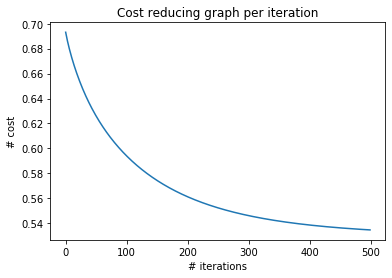

In [26]:
plt.plot(result['costs'])
plt.xlabel('# iterations')
plt.ylabel('# cost')
plt.title('Cost reducing graph per iteration')

#### Accuracy calculation

In [27]:
print("Training accuracy: ",np.mean(ytrain==result['predicted']))

Training accuracy:  0.8305084745762712


#### Visualize learned decesion boundary

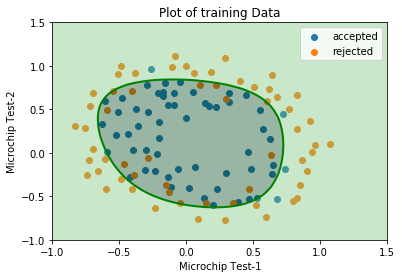

In [28]:
up_thetas = result['theta']
ones = featureset[target[:,0]==1]
zeros = featureset[target[:,0]==0]


plt.scatter(ones[:,0], ones[:,1])
plt.scatter(zeros[:,0], zeros[:, 1])

u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros((u.size, v.size))
# Evaluate z = theta*x over the grid
for i, ui in enumerate(u):
    for j, vj in enumerate(v):
        z[i, j] = np.dot(feature_mapping(ui, vj), up_thetas.flatten())

z = z.T  # important to transpose z before calling contour
# print(z)

# Plot z = 0
plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

plt.xlabel("Microchip Test-1")
plt.ylabel("Microchip Test-2")
plt.title("Plot of training Data")
plt.legend(["accepted",'rejected'])